In [33]:
import yfinance as yf

df = yf.download('SPY')
print(df.head())

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_11448\2231470556.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('SPY')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.452520  24.469912  24.348171  24.469912  1003200
1993-02-01  24.626434  24.626434  24.469910  24.469910   480500
1993-02-02  24.678606  24.695998  24.556865  24.609040   201300
1993-02-03  24.939476  24.956868  24.695994  24.713386   529400
1993-02-04  25.043842  25.096017  24.748186  25.026451   531500


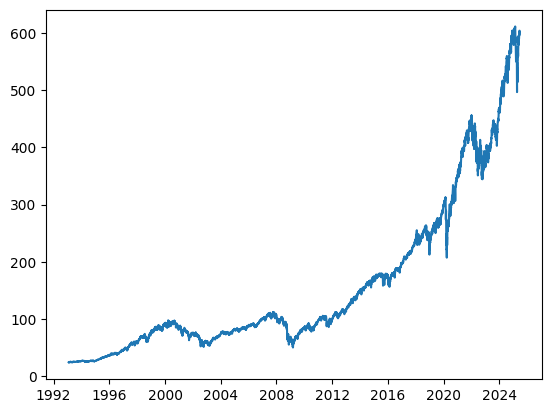

In [34]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [35]:

df['MA'] = df['Close', 'SPY'].rolling(window=50).mean()
print(df.head())
del df['New Column']


Price           Close       High        Low       Open   Volume  MA
Ticker            SPY        SPY        SPY        SPY      SPY    
Date                                                               
1993-01-29  24.452520  24.469912  24.348171  24.469912  1003200 NaN
1993-02-01  24.626434  24.626434  24.469910  24.469910   480500 NaN
1993-02-02  24.678606  24.695998  24.556865  24.609040   201300 NaN
1993-02-03  24.939476  24.956868  24.695994  24.713386   529400 NaN
1993-02-04  25.043842  25.096017  24.748186  25.026451   531500 NaN


KeyError: ('New Column',)

In [ ]:
df


Price,Close,High,Low,Open,Volume,MA
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.452526,24.469918,24.348177,24.469918,1003200,NaN
1993-02-01,24.626423,24.626423,24.469899,24.469899,480500,NaN
1993-02-02,24.678589,24.695980,24.556848,24.609023,201300,NaN
1993-02-03,24.939484,24.956875,24.696002,24.713393,529400,NaN
1993-02-04,25.043831,25.096006,24.748175,25.026439,531500,NaN
...,...,...,...,...,...,...
2025-06-05,593.049988,599.000000,591.049988,597.630005,92278700,560.752201
2025-06-06,599.140015,600.830017,596.859985,598.659973,66588700,561.363201


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_8680\1031594912.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


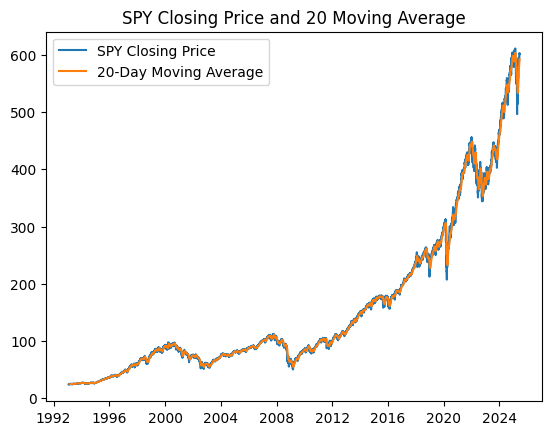

In [ ]:


df = yf.download(TICKER)
df['MA'] = df['Close'].rolling(window=WINDOW).mean()


plt.plot(df['Close', 'SPY'])
plt.plot(df['MA'])
plt.legend([f'{TICKER} Closing Price', f'{WINDOW}-Day Moving Average'])
plt.title(f'{TICKER} Closing Price and {WINDOW} Moving Average');

In [ ]:
import numpy as np
df = df.dropna()
df.columns = df.columns.get_level_values(0)

def add_ma_strategy(df):
    
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    return df
df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) -1
df['Strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) -1


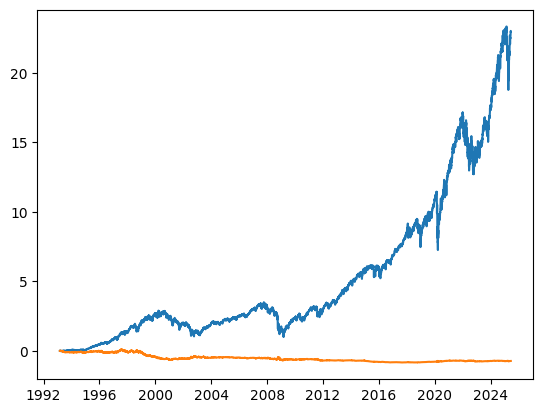

In [ ]:
plt.plot(df['asset_cumulative'])
plt.plot(df['Strategy_cumulative'])


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_11452\407577635.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER) # Actually getting the data from Yahoo Finance, the get_data function returns a DataFrame with the historical data of the ticker
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,10_ma,20_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
2024-05-02,498.682983,499.532191,493.271843,497.814038,62550200,497.183096,500.756612,-1.0,0.006076,-0.009353
2024-05-03,504.864349,506.108494,502.168648,504.735978,72756700,498.775830,500.404097,-1.0,0.018547,-0.021633
2024-05-06,510.078003,510.117479,506.849079,507.293436,47264700,500.439655,500.297951,-1.0,0.029065,-0.031736
2024-05-07,510.640839,512.052860,509.959508,511.055543,52561300,501.574216,500.190323,1.0,0.030200,-0.032805
2024-05-08,510.690186,511.233261,508.665961,508.784448,42047200,502.737411,500.341895,1.0,0.030300,-0.032711
...,...,...,...,...,...,...,...,...,...,...
2025-06-06,599.140015,600.830017,596.859985,598.659973,66588700,591.435004,588.721005,1.0,0.208745,-0.208466
2025-06-09,599.679993,601.250000,598.489990,599.719971,53016400,593.492004,590.488004,1.0,0.209834,-0.207753
2025-06-10,603.080017,603.469971,599.090027,600.219971,66247000,594.685004,591.492505,1.0,0.216693,-0.203261


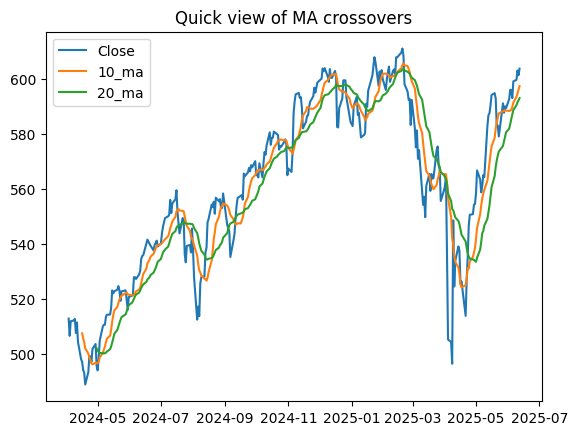

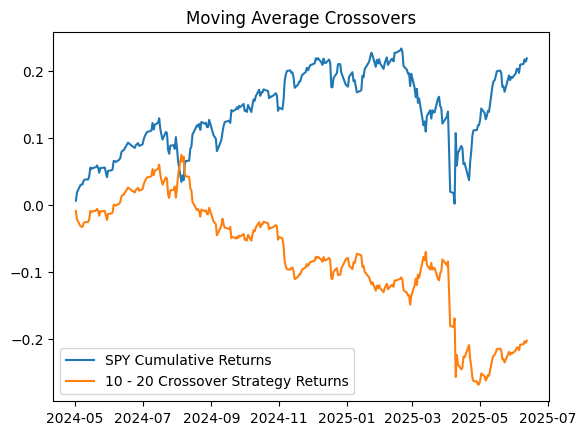

In [ ]:
import numpy as np # we use NumPy for numerical operations
import yfinance as yf # where we get our data
import matplotlib.pyplot as plt # we use Matplotlib to plot our data
import pandas as pd # we use Pandas to manipulate our data

TICKER = 'SPY'  # the ticker we want to analyse
FAST = 10 # the fast moving average window
SLOW = 20 # the slow moving average window
LOOKBACK = 300 # how many days of data we want to look back

def get_data (): # Function to get the data
    df = yf.download(TICKER) # Actually getting the data from Yahoo Finance, the get_data function returns a DataFrame with the historical data of the ticker
    df.columns = df.columns.get_level_values(0)  # Flatten multi-index columns from yfinance

    return df.iloc[-LOOKBACK:, :] # We return only the last LOOKBACK days of data


def add_moving_averages(df, fast=FAST, slow=SLOW): # Function to add moving averages to the DataFrame
    df[f'{fast}_ma'] = df['Close'].rolling(window=fast).mean() # Calculate the fast moving average
    df[f'{slow}_ma'] = df['Close'].rolling(window=slow).mean() # Calculate the slow moving average#

    #Quick visualisation of moving averages
    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title('Quick view of MA crossovers')
    
    return df.dropna()  # Drop rows with NaN values after calculating moving averages (e.g if MA is 3 days first 2 days wont have values)


def add_strategy(df, fast=FAST, slow=SLOW): # Function to add the strategy based on moving averages to the DataFrame
    # Our strategy is long when fast > slow, and short otherwise BIG BRAIN :-)
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1) # NP.WHERE = vectorized way to apply a condition to make a strategy column
    df['Strategy'] = df['Strategy'].shift(1)  # Shift strategy to as if we are entering the position at the close of the previous day, otherwise we would be getting insane returns
    return df # Return the DataFrame with the strategy column added


def test_strategy(df): # Function to calculate our big returns
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1 # Buy and hold boring returns. CUMPROD = Cumulative returns
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy'].shift()).cumprod() - 1 # Jim Simons style returns
    return df.dropna() # Again drop any Nan values. Why do we need to drop again? -> Because we are calculating returns based on the strategy, and the first row will have NaN values for the returns since there is no previous day to calculate the return from

df = get_data() # Why do we need to create the pipeline like this? -> We created the functions but we need to call them so we can get the data and add the moving averages and strategy to the DataFrame
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df)
    
plt.figure() # Why do we need to do this? -> Because we want to create a new figure for the plot, otherwise it will plot on the same figure as the previous plot
plt.plot(df['Asset_Returns'])
plt.plot(df['Strategy_Returns'])
plt.legend([f'{TICKER} Cumulative Returns', f'{FAST} - {SLOW} Crossover Strategy Returns'])
plt.title('Moving Average Crossovers')

    
df # To show the final DataFrame with all the calculations and strategy applied



C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_13864\1006165535.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Virgin Fund vs Alpha Generating Day Trader')

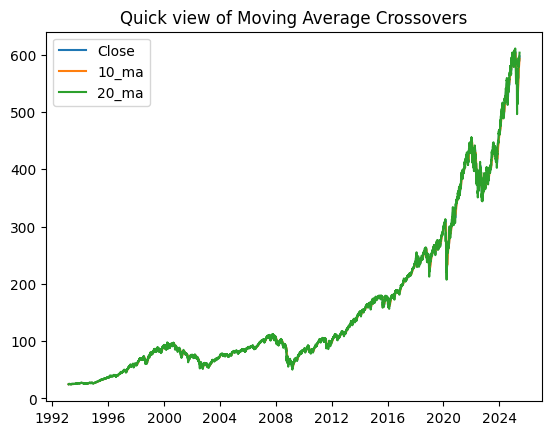

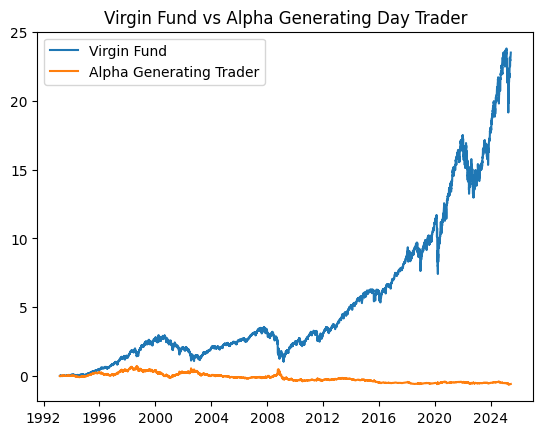

In [ ]:
# Practiced 13th June 2025

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

TICKER = 'SPY'
FAST = 10
SLOW = 20
LOOKBACK = 10000

# Get data, add indicators, add strategy, test strategy and then plot the results


def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]


def add_moving_averages(df, fast = FAST, slow = SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(window = fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(window = slow).mean()

    return df.dropna()

def add_strategy(df, fast = FAST, slow = SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)

    return df.dropna()
    

def test_strategy(df):
    df['Virgin Fund'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Alpha Generated Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1
    
    return df.dropna()

df = get_data()
df = add_moving_averages(df)
df = add_strategy(df)
df = test_strategy(df)
df

plt.plot(df[f'{FAST}_ma'])
plt.plot(df[f'{SLOW}_ma'])
plt.plot(df['Close'])
plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
plt.title('Quick view of Moving Average Crossovers')


plt.figure()
plt.plot(df['Virgin Fund'])
plt.plot(df['Alpha Generated Returns'])
plt.legend(['Virgin Fund', 'Alpha Generating Trader'])
plt.title('Virgin Fund vs Alpha Generating Day Trader')




C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_18236\3898064543.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Averages Crossovers')

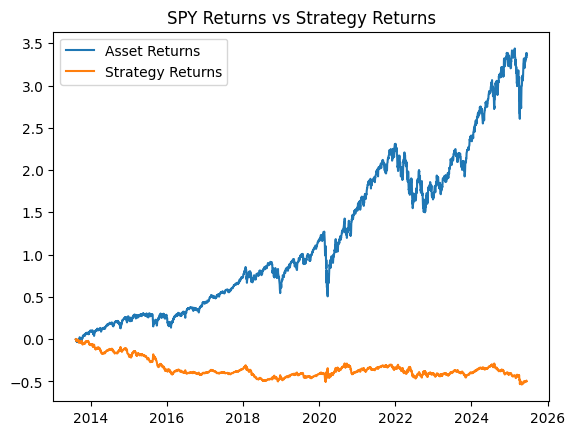

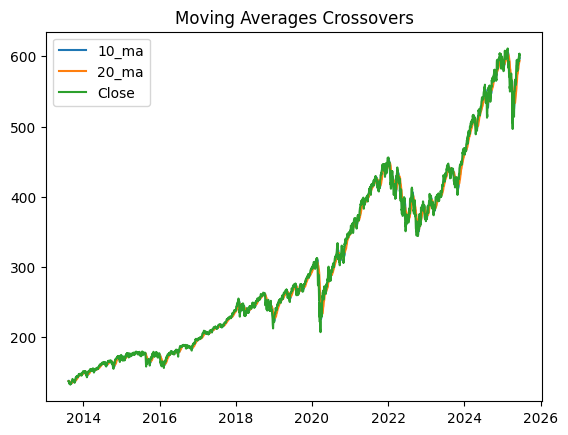

In [26]:
# Practice 14th June 33mins taken

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TICKER = 'SPY'
FAST = 10
SLOW = 20
LOOKBACK = 3000

# Get data, build MA, add strategy, test strategy, plot results

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df,fast = FAST, slow = SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(window = FAST).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(window = SLOW).mean()

    return df.dropna()

def add_strategy(df, fast = FAST, slow = SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    
    return df.dropna()

def test_strategy(df, fast = FAST, slow = SLOW):
    df['Asset Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    return df.dropna()


df = get_data()
df = add_moving_averages(df)
df = add_strategy(df)
df = test_strategy(df)
df

plt.plot(df['Asset Returns'])
plt.plot(df['Strategy Returns'])
plt.legend(['Asset Returns', 'Strategy Returns'])
plt.title(f'{TICKER} Returns vs Strategy Returns')

plt.figure()
plt.plot(df[f'{FAST}_ma'])
plt.plot(df[f'{SLOW}_ma'])
plt.plot(df['Close'])
plt.legend([f'{FAST}_ma', f'{SLOW}_ma', 'Close'])
plt.title('Moving Averages Crossovers')



C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_18236\1766195900.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Cumulative Returns vs SPY Strategy Returns')

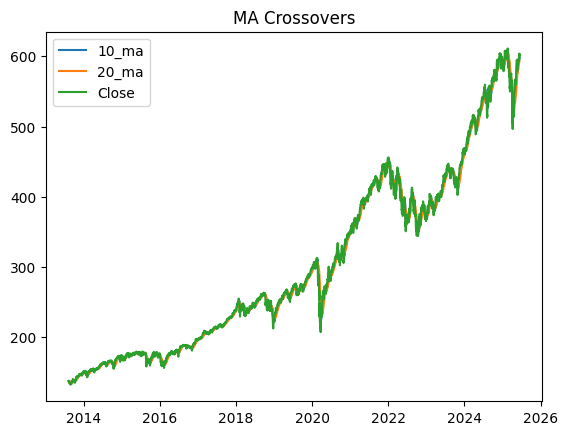

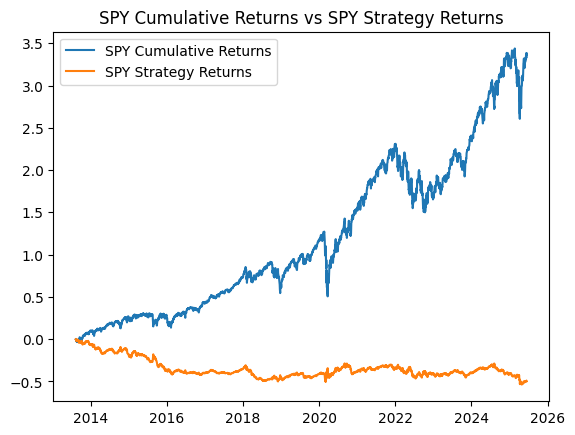

In [ ]:

# 15th June time taken 15mins

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TICKER = 'SPY'
FAST = 10
SLOW = 20
LOOKBACK = 3000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast = FAST, slow = SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(window = FAST).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(window = SLOW).mean()

    return df.dropna()

def add_strategy(df, fast  = FAST, slow = SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)

    return df.dropna()

def test_strategy(df):
    df['Asset Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    return df

df = get_data()
df = add_moving_averages(df)
df = add_strategy(df)
df = test_strategy(df)
df

plt.plot(df[f'{FAST}_ma'])
plt.plot(df[f'{SLOW}_ma'])
plt.plot(df['Close'])
plt.legend([f'{FAST}_ma', f'{SLOW}_ma', 'Close'])
plt.title('MA Crossovers')


plt.figure()
plt.plot(df['Asset Returns'])
plt.plot(df['Strategy Returns'])
plt.legend([f'{TICKER} Cumulative Returns', f'{TICKER} Strategy Returns'])
plt.title(f'{TICKER} Cumulative Returns vs {TICKER} Strategy Returns')



C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_2580\884258724.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


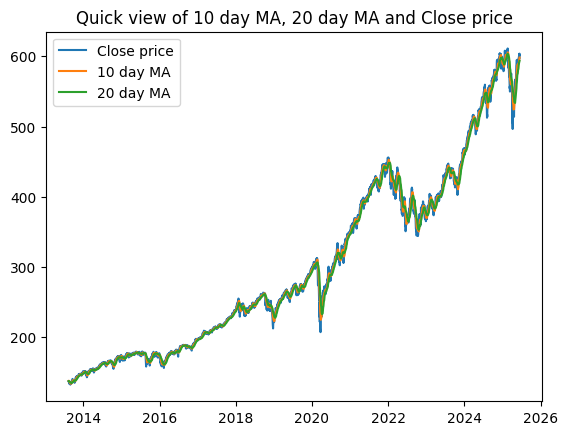

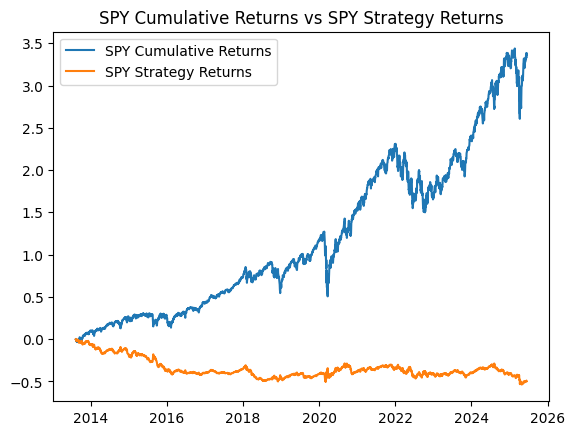

In [ ]:
# Practice 16th june time taken 16 mins

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TICKER = 'SPY'
FAST = 10
SLOW = 20
LOOKBACK = 3000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_MA(df, fast = FAST, slow = SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(FAST).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(SLOW).mean()

    return df.dropna()

def add_strategy(df, fast = FAST, slow = SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)

    return df.dropna()

def test_strategy(df):
    df['Asset Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    return df.dropna()


df = get_data()
df = add_MA(df)
df = add_strategy(df)
df = test_strategy(df)
df

plt.plot(df['Close'])
plt.plot(df[f'{FAST}_ma'])
plt.plot(df[f'{SLOW}_ma'])
plt.title(f'Quick view of {FAST} day MA, {SLOW} day MA and Close price')
plt.legend(['Close price', f'{FAST} day MA', f'{SLOW} day MA'])

plt.figure()
plt.plot(df['Asset Returns'])
plt.plot(df['Strategy Returns'])
plt.title(f'{TICKER} Cumulative Returns vs {TICKER} Strategy Returns')
plt.legend([f'{TICKER} Cumulative Returns', f'{TICKER} Strategy Returns'])

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_18564\2642938827.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Cumulative Returns vs SPY Strategy Returns')

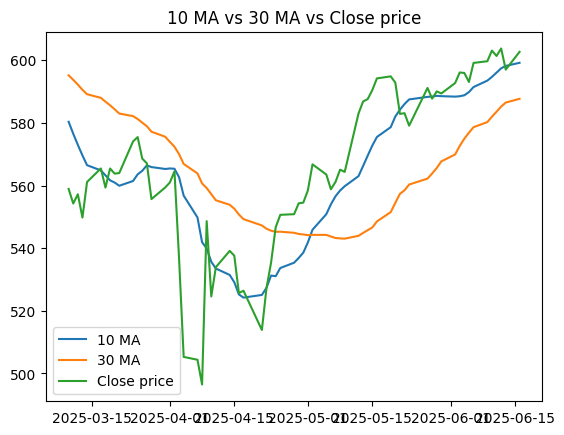

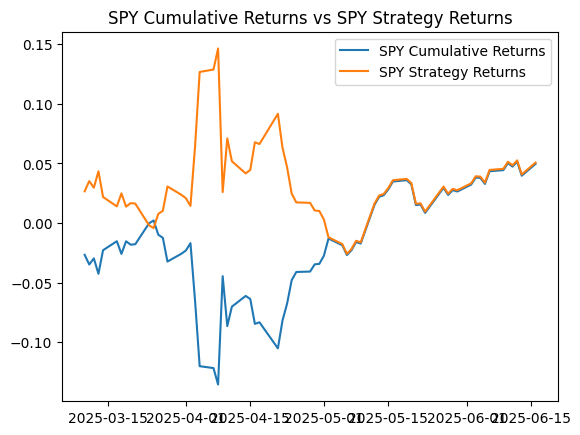

In [ ]:
#17th june time taken 13 mins
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TICKER = 'SPY'
FAST = 10
SLOW = 30
LOOKBACK = 100

def get_data():
    df = yf.download(TICKER)
    df.columns= df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_MA(df, fast = FAST, slow = SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(slow).mean()

    return df.dropna()

def add_strategy(df, fast = FAST, slow = SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1 )
    df['Strategy'] = df['Strategy'].shift(1)
    return df.dropna()

def test_strategy(df):
    df['Asset Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1
    return df.dropna()

df = get_data()
df = add_MA(df)
df = add_strategy(df)
df = test_strategy(df)
df

plt.plot(df[f'{FAST}_ma'])
plt.plot(df[f'{SLOW}_ma'])
plt.plot(df['Close'])
plt.legend([f'{FAST} MA', f'{SLOW} MA', 'Close price'])
plt.title(f'{FAST} MA vs {SLOW} MA vs Close price')

plt.figure()
plt.plot(df['Asset Returns'])
plt.plot(df['Strategy Returns'])
plt.legend([f'{TICKER} Cumulative Returns', f'{TICKER} Strategy Returns'])
plt.title(f'{TICKER} Cumulative Returns vs {TICKER} Strategy Returns')

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_25892\214651957.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period = PERIOD, interval = INTERVAL)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Cumulative Returns vs SPY Strategy Returns')

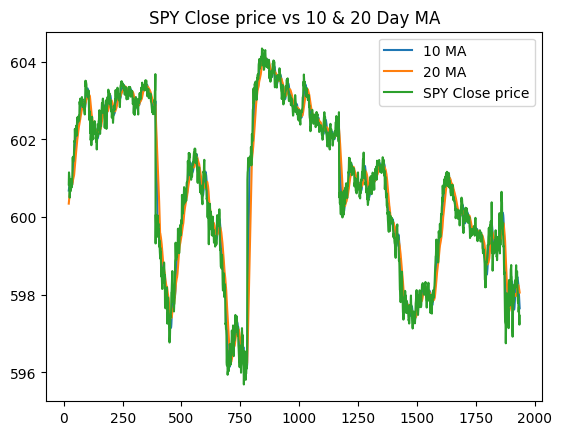

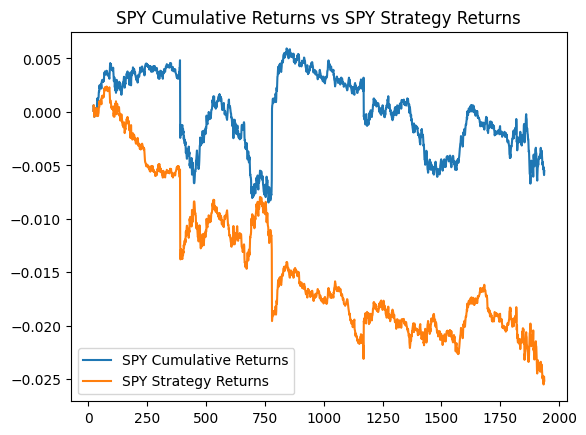

In [32]:
# Interval = frequency of data points
# Period = how far back data you wish to download
# LOOKBACK = how far back data you wish to use AFTER DOWNLOAD

# But why period & lookback?
# Some technial indicators e.g. moving avergaes need extra data before the LOOKBACK window to calculate initial values
# Also we can quickly test different lookbacks without redownloading

# yahoo caps hourly data at 730d for some reason. So cannot just sayt period = max as gets confused


# 20th June time taken 26 mins with new data acquisition function

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TICKER = 'SPY'
FAST = 10
SLOW = 20
LOOKBACK = 100000
INTERVAL = '1m' # For hourly max data is 730d and for minutely typically around 7d
PERIOD = 'max' 


def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):
    df = yf.download(ticker, period = PERIOD, interval = INTERVAL)
    df.columns = df.columns.get_level_values(0)
    df = df.reset_index(drop = True)
    return df.iloc[-lookback:, :]

def add_MA(df, fast = FAST, slow = SLOW):
    df[f'{fast} MA'] = df['Close'].rolling(window = FAST).mean()
    df[f'{slow} MA'] = df['Close'].rolling(window = SLOW).mean()

    return df.dropna()

def add_strategy(df, fast = FAST, slow = SLOW):
    df['Strategy'] = np.where(df[f'{fast} MA'] > df[f'{slow} MA'], 1, -1)#
    df['Strategy'] = df['Strategy'].shift(1)

    return df.dropna()

def test_strategy(df):
    df['Asset Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    return df.dropna()

df = get_data()
df = add_MA(df)
df = add_strategy(df)
df = test_strategy(df)
df

plt.plot(df[f'{FAST} MA'])
plt.plot(df[f'{SLOW} MA'])
plt.plot(df['Close'])
plt.legend([f'{FAST} MA', f'{SLOW} MA', f'{TICKER} Close price'])
plt.title(f'{TICKER} Close price vs {FAST} & {SLOW} Day MA')

plt.figure()
plt.plot(df['Asset Returns'])
plt.plot(df['Strategy Returns'])
plt.legend([f'{TICKER} Cumulative Returns', f'{TICKER} Strategy Returns'])
plt.title(f'{TICKER} Cumulative Returns vs {TICKER} Strategy Returns')